In [3]:
#add if to check if no license plate is detected
#add else and loop through all plates
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [4]:
classes = {0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z'}
model = load_model('model.h5')

In [5]:
def show(image):
    plt.imshow(image,cmap='gray')

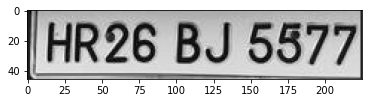

In [6]:
plate = cv2.imread("plate_1.jpg")
gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
show(gray)

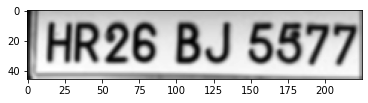

In [7]:
blur = cv2.GaussianBlur(gray,(5,5),0)
show(blur)

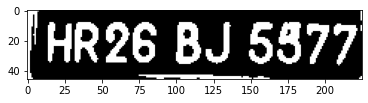

In [8]:
binary = cv2.threshold(blur, 180, 255,
                         cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
show(binary)

In [9]:
cont, _  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(cont)

16

In [10]:
# kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
# thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)
# show(thre_mor)

Detect 10 letters...


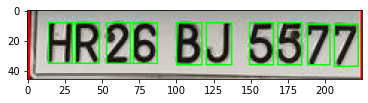

In [11]:
def sort_contours(cnts,reverse = False):
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),key=lambda b: b[1][i], reverse=reverse))
    return cnts

cont, _  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# creat a copy version "test_roi" of plat_image to draw bounding box
test_roi = plate.copy()

# Initialize a list which will be used to append charater image
crop_characters = []

# define standard width and height of character
digit_w, digit_h = 96, 96

for c in sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    ratio = h/w
    if 1<=ratio<=3.5: # Only select contour with defined ratio
        if h/plate.shape[0]>=0.2: # Select contour which has the height larger than 50% of the plate
            # Draw bounding box arroung digit number
            cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 1)
            plt.imshow(test_roi)
            # Seprate number and give prediction
            curr_num = binary[y-5:y+h+5,x-5:x+w+5]
            curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
            _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            crop_characters.append(curr_num)
            
print("Detect {} letters...".format(len(crop_characters)))

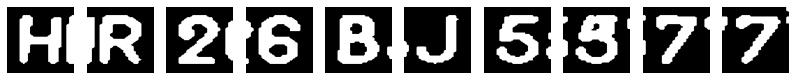

In [12]:
fig = plt.figure(figsize=(14,4))
grid = GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)

for i in range(len(crop_characters)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.imshow(crop_characters[i],cmap="gray")

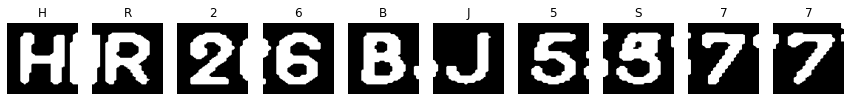

In [13]:
fig = plt.figure(figsize=(15,3))
cols = len(crop_characters)
grid = GridSpec(ncols=cols,nrows=1,figure=fig)

for i,character in enumerate(crop_characters):
    fig.add_subplot(grid[i])
    image = np.stack((character,)*3, axis=-1)
    image = np.expand_dims(image,axis = 0)
    clas = classes[np.argmax(model.predict(image))]
    plt.title('{}'.format(str(clas),fontsize=30))
    plt.axis(False)
    plt.imshow(character,cmap='gray')